# A

as you can see from the plots on the bottom, the S32 spline interpolation is free of the wide oscillations in the Runge phenomenon.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 1/(1+25*x**2)

def df(x):
    return -50*x/(1+25*x**2)**2

In [2]:
#generate points for spline
for ii in range(0,5):
    N = 1+5*2**ii
    txt = open("output/A_"+str(N)+".txt",'w')
    txt.write(str(N)+"\n")
    x = np.linspace(-1,1,N)
    y = f(x)
    for i in range(0,N):
        txt.write(str(x[i])+" "+str(y[i])+"\n")
    txt.write("\n")
    txt.write(str(df(x[0]))+" "+str(df(x[N-1]))+"\n")
    txt.close()

N = 6, max error = 0.4217052
N = 11, max error = 0.02052939999999981
N = 11, convergence rate = 0.27476804423976153
N = 21, max error = 0.0031688374999998548
N = 21, convergence rate = 0.23290198525377218
N = 41, max error = 0.0002757236778846428
N = 41, convergence rate = 0.17884542862364988
N = 81, max error = 1.651426009241508e-05
N = 81, convergence rate = 0.12528194462981784


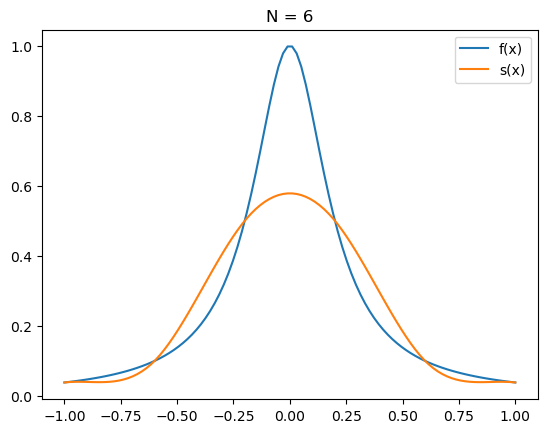

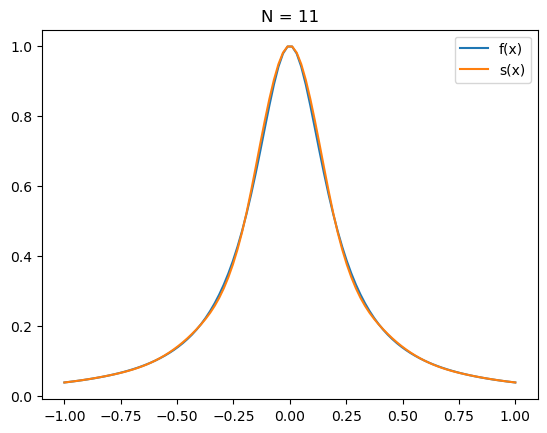

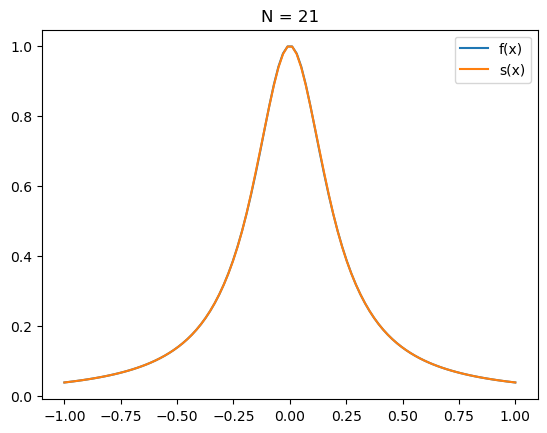

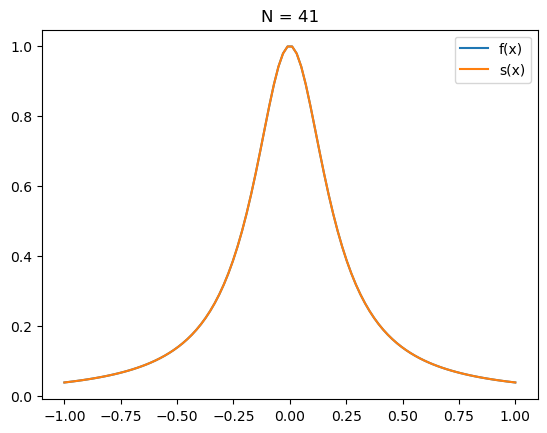

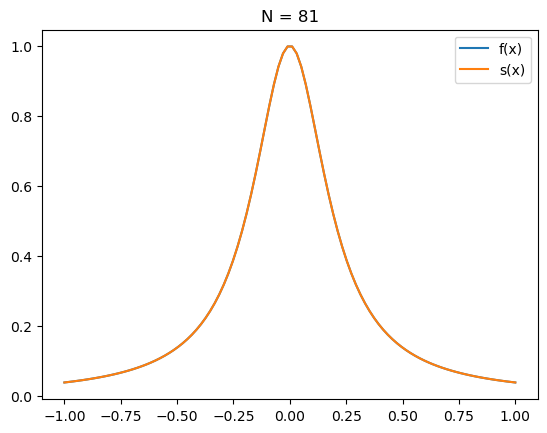

In [13]:
def eval_spline(x,points,coeffs):
    # n = number of points to evaluate
    n= len(x)
    # s stores s(x) for each point in x
    s = np.zeros(n,dtype=float)
    for i in range(0,n):
        # evaluate s(x) for point x[i]
        found = 0
        for j in range(0,len(points)-1):
            # decide which interval x[i] in
            if x[i]>=points[j] and x[i]<=points[j+1]:
                s[i] = coeffs[j,0]+coeffs[j,1]*(x[i]-points[j])+coeffs[j,2]*(x[i]-points[j])**2+coeffs[j,3]*(x[i]-points[j])**3
                found = 1
                break
        if not found:
            print("x["+str(i)+"] = "+str(x[i])+" not in [-1,1]!\n")
            s[i] = 0
    return s

max_err = np.zeros(5,dtype=float)
# get points and coefficients
for ii in range(0,5):
    N = 1+5*2**ii
    # get coefficients
    txt = open("output/D1S32_coefficients_"+str(N)+".txt",'r')
    coeffs = np.zeros((N-1,4))
    for i in range(0,N-1):
        line = txt.readline()
        coeffs[i,:] = np.array(line.split(),dtype=float)
    
    # get points
    points = np.linspace(-1,1,N)

    # calculate s(x)
    x = np.linspace(-1,1,100)
    y = f(x)
    s = eval_spline(x,points,coeffs)

    # interpolation error vector at mid-points
    x_mid = np.zeros(N-1)
    for i in range(0,N-1):
        x_mid[i] = (points[i]+points[i+1])/2
    err = abs(f(x_mid)-eval_spline(x_mid,points,coeffs))
    max_err[ii] = max(abs(err))
    print("N = "+str(N)+", max error = "+str(max_err[ii]))

    # convergence rate with respect to N
    # the max_err shrink rate each time N+1
    if ii>0:
        Ck = max_err[ii]/max_err[0]
        print("N = "+str(N)+", convergence rate = "+str(-np.log(Ck)/N))

    # plot
    plt.figure(ii)
    plt.title("N = "+str(N))
    plt.plot(x,y,x,s)
    plt.legend(["f(x)","s(x)"])
    plt.show